In [23]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
import numpy as np

In [21]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(X)

In [ ]:
normalized_data = preprocessing.normalize(X)
print(normalized_data)

In [26]:
mean_vec = np.mean(normalized_data, axis=0)
cov_mat = (normalized_data - mean_vec).T.dot((normalized_data - mean_vec)) / (normalized_data.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 0.00196848  0.00344386 -0.00614974 -0.00310986]
 [ 0.00344386  0.01115638 -0.01630873 -0.00739517]
 [-0.00614974 -0.01630873  0.02559563  0.01183448]
 [-0.00310986 -0.00739517  0.01183448  0.00608039]]


In [27]:
cov_mat = np.cov(normalized_data.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.18359702  0.60210709  0.73783695  0.2436305 ]
 [ 0.49546167 -0.64966313  0.50106685 -0.28528504]
 [-0.76887947 -0.05931229  0.40257349 -0.49319469]
 [-0.36004754 -0.46031175  0.2060661   0.78486663]]

Eigenvalues 
[4.31151532e-02 1.23590154e-03 8.33081887e-05 3.66512949e-04]


In [28]:
pca = PCA(n_components=2)
normalized_data_r = pca.fit(normalized_data).transform(normalized_data)
print(normalized_data_r)

[[ 0.30163722  0.00071565]
 [ 0.27092065  0.04235377]
 [ 0.29767949  0.00240655]
 [ 0.26266611  0.00266704]
 [ 0.30746945 -0.01871929]
 [ 0.275612   -0.03444468]
 [ 0.28980438 -0.03967502]
 [ 0.28272107  0.00228959]
 [ 0.26267711  0.01087568]
 [ 0.26981556  0.03649911]
 [ 0.29980315  0.00193011]
 [ 0.26894153 -0.01624238]
 [ 0.27699897  0.0419604 ]
 [ 0.3219414   0.00140409]
 [ 0.34876933  0.00486114]
 [ 0.32366368 -0.05650449]
 [ 0.32360826 -0.03014443]
 [ 0.29581749 -0.00659527]
 [ 0.27608892  0.00524753]
 [ 0.29990233 -0.03996396]
 [ 0.25805873  0.03131347]
 [ 0.28863385 -0.03658506]
 [ 0.363187   -0.05014394]
 [ 0.23311232 -0.00311721]
 [ 0.22878198 -0.02023955]
 [ 0.24394342  0.04727866]
 [ 0.25775078 -0.01389244]
 [ 0.28872239  0.00756523]
 [ 0.29573627  0.01994987]
 [ 0.25569464 -0.00185349]
 [ 0.24955962  0.01879597]
 [ 0.27168896  0.01987446]
 [ 0.32636668 -0.04834348]
 [ 0.33674586 -0.03953569]
 [ 0.26372033  0.02876174]
 [ 0.31075178  0.02951536]
 [ 0.31322245  0.0333198 ]
 

In [19]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

explained variance ratio (first two components): [0.962373   0.02758655]


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PCA of IRIS dataset')

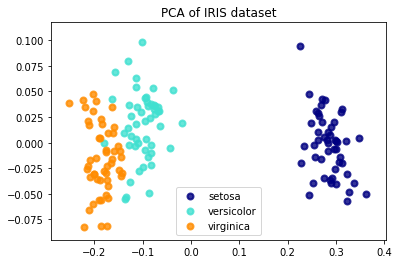

In [20]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(normalized_data_r[y == i, 0], normalized_data_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')